### Загрузка библиотек

In [1]:
# Google drive mount
from google.colab import drive
drive.mount('/content/drive')

# Read a csv-file into DataFrame.
from pandas import read_csv

# Split arrays or matrices into train and test subsets.
from sklearn.model_selection import train_test_split

# Standardize features by removing the mean and scaling to unit variance
from sklearn.preprocessing import StandardScaler

# Mean absolute error regression loss.
from sklearn.metrics import mean_absolute_error

# A Sequential model is appropriate for a plain stack of layers where each 
# layer has exactly one input tensor and one output tensor.
from keras import Sequential

# Dense - regular densely-connected NN layer.
# Applies Dropout to the input.
from keras.layers import Dense, Dropout

# matplotlib.pyplot is a collection of functions that
# make matplotlib work like MATLAB.
from matplotlib import pyplot as plt

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Загрузка данных из файла dataset.csv в pandas-датафрейм

In [2]:
# load the dataset
path = 'drive/MyDrive/Colab Notebooks/Internship/lesson_17/dataset.csv'
df = read_csv(path, names=['position','intention','success'], skiprows=1)
df

,position,intention,success
0,23.657801,18.859917,0.0
1,22.573729,17.969223,0.0
2,32.553424,29.463651,0.0
3,6.718035,25.704665,1.0
4,14.401919,16.770856,0.0
...,...,...,...
292,27.697220,18.799309,0.0
293,15.150959,72.000352,1.0
294,22.264378,68.453459,1.0
295,25.677420,90.118212,1.0


### Разделение на входные и выходные столбцы

In [3]:
# Split into input and output columns
X = df.drop(columns=['success']).to_numpy()
y = df.drop(columns=['position', 'intention']).to_numpy()
print(X[:5])
print(y[:5])

[[23.65780072 18.8599168 ]
 [22.57372914 17.96922325]
 [32.55342397 29.46365141]
 [ 6.71803504 25.70466547]
 [14.40191857 16.77085649]]
[[0.]
 [0.]
 [0.]
 [1.]
 [0.]]


### Разделение на обучающие и тестовые наборы данных

In [4]:
# Split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8)

### Преобразование входных данных путем их шкалирования

In [5]:
# Scale the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train= scaler.transform(X_train)
X_test = scaler.transform(X_test)
print(X_train[:5])
print(X_test[:5])

[[ 1.22182837 -0.85928553]
 [ 0.8793858   1.1614659 ]
 [-1.67963444  0.24438451]
 [-0.82710538 -0.33225654]
 [-1.95163744 -0.9828957 ]]
[[ 0.86916048 -0.18893831]
 [ 0.10471587  2.26843078]
 [-0.98849008  0.28754592]
 [-0.72847417 -1.20404737]
 [ 0.59585858 -1.27883516]]


### Построение, компилирование и обучение модели

In [6]:
# Define model
model = Sequential()
model.add(Dense(28,
                activation='relu',
                kernel_initializer='he_normal',
                input_shape=(2,)))
model.add(Dense(20,
                activation='relu',
                kernel_initializer='he_normal')) # the way to set the initial
                                                 # random weights of Keras layers.
                                                 # He normal initializer.
                                                 # It draws samples from a truncated
                                                 # normal distribution.
model.add(Dropout(0.05))
model.add(Dense(6, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['acc'])
# Fit the model
history = model.fit(X_train, y_train,
                    epochs=130,
                    batch_size=8,
                    verbose=2,
                    validation_data=(X_test, y_test))

Epoch 1/130
30/30 - 1s - loss: 0.6730 - acc: 0.5485 - val_loss: 0.5399 - val_acc: 0.6500 - 783ms/epoch - 26ms/step
Epoch 2/130
30/30 - 0s - loss: 0.4645 - acc: 0.7932 - val_loss: 0.3890 - val_acc: 0.9333 - 79ms/epoch - 3ms/step
Epoch 3/130
30/30 - 0s - loss: 0.3751 - acc: 0.8819 - val_loss: 0.2956 - val_acc: 0.9333 - 105ms/epoch - 3ms/step
Epoch 4/130
30/30 - 0s - loss: 0.3139 - acc: 0.8987 - val_loss: 0.2358 - val_acc: 0.9500 - 90ms/epoch - 3ms/step
Epoch 5/130
30/30 - 0s - loss: 0.2848 - acc: 0.9072 - val_loss: 0.1982 - val_acc: 0.9500 - 93ms/epoch - 3ms/step
Epoch 6/130
30/30 - 0s - loss: 0.2664 - acc: 0.8987 - val_loss: 0.1836 - val_acc: 0.9667 - 80ms/epoch - 3ms/step
Epoch 7/130
30/30 - 0s - loss: 0.2615 - acc: 0.9114 - val_loss: 0.1742 - val_acc: 0.9500 - 74ms/epoch - 2ms/step
Epoch 8/130
30/30 - 0s - loss: 0.2479 - acc: 0.9156 - val_loss: 0.1602 - val_acc: 0.9500 - 78ms/epoch - 3ms/step
Epoch 9/130
30/30 - 0s - loss: 0.2451 - acc: 0.9198 - val_loss: 0.1608 - val_acc: 0.9667 - 92

### Результаты обучения в виде кривых loss-функций (тренировочной и валидационной), а также acc (тренировочного и валидационного)



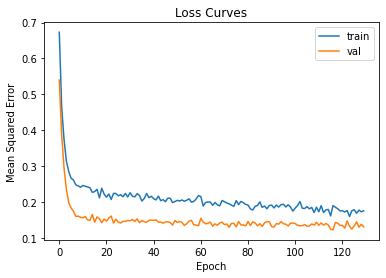

In [7]:
# plot loss curves
plt.title('Loss Curves')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()

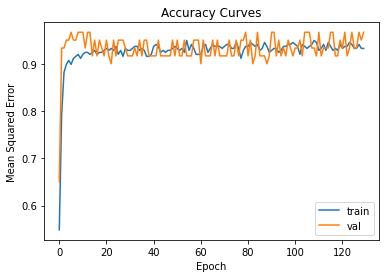

In [8]:
# plot acc curves
plt.title('Accuracy Curves')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='val')
plt.legend()
plt.show()